## Image classification

### jey@aims.ac.za


# Module importation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

Using TensorFlow backend.


1.15.0


## Load the dataset

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 4s 0us/step


In [ ]:
# Your remaining code here.
# Create additional cells and place your code neatly for easy readability. You can add a new cell by clicking on the `+ Code` button on the top left.

# 1. Split the data

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.3)

### View of shapes


In [ ]:
print (X_train.shape)
print (Y_train.shape)

(35000, 32, 32, 3)
(35000, 1)


In [ ]:
print(X_val.shape)
print (Y_val.shape)

(15000, 32, 32, 3)
(15000, 1)


In [ ]:
print(X_test.shape)
print (Y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


### Find the unique numbers from the train labels

In [ ]:
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  100
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


### Plot some of the data


Text(0.5, 1.0, 'Ground Truth : [43]')

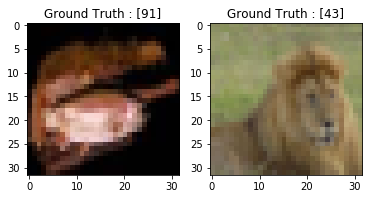

In [ ]:
data_point = 15

plt.figure(figsize=[6,3])
 
# training data
plt.subplot(121)
plt.imshow(X_train[data_point,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[data_point]))
 
# testing data
plt.subplot(122)
plt.imshow(X_test[data_point,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[data_point]))

### We don't need to reshape the data here because the deep is already in depth 3

### Normalization


In [ ]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [ ]:
X_train.max()

1.0

### One hot coding

In [ ]:
Y_train[0]

array([59])

In [ ]:
Y_train = np_utils.to_categorical(Y_train, 100)
Y_val = np_utils.to_categorical(Y_val, 100)
Y_test = np_utils.to_categorical(Y_test, 100)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# 2. Create a CNN model


### Network1

In [ ]:
def baseline_model1():
    # create model
    model = Sequential()
    
    model.add(Conv2D(filters=200, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate = 0.4))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate = 0.4))
    
    model.add(Dense(100, activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    return model

**Network1** the accuracy of the prediction on the training data is 0.2597! too small and confusion matrix has shown too many prediction error!



### Network2

In [ ]:
def baseline_model2():
    # create model
    model = Sequential()
    
    model.add(Conv2D(filters=200, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate = 0.4))

    model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate = 0.4))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))


    model.add(Dropout(rate = 0.4))
    
    model.add(Dense(100, activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    return model

**Network2** the accuracy of the prediction on the training data is 0.39! better then the previous one but still too small and confusion matrix has shown too many prediction error!



### Network3

In [ ]:
def baseline_model3():
    # create model
    model = Sequential()
    
    model.add(Conv2D(filters=200, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate = 0.4))

    model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate = 0.4))

    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(rate = 0.4))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='linear'))


    model.add(Dropout(rate = 0.4))
    
    model.add(Dense(100, activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    return model

**Network3** more complex then the previous one! But the accuracy is still sthe same 3.954. So the model isn't good


# Testing the model

In [ ]:
model = baseline_model3()

Determine the number of trainable parameters




In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 200)       2600      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 200)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 200)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

### The training

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150, batch_size=200, verbose=1)

Train on 35000 samples, validate on 10000 samples
Epoch 1/150
35000/35000 [==============================] - 9s 255us/step - loss: 4.3388 - acc: 0.0433 - val_loss: 3.9870 - val_acc: 0.0966
Epoch 2/150
35000/35000 [==============================] - 8s 237us/step - loss: 3.8593 - acc: 0.1015 - val_loss: 3.6029 - val_acc: 0.1589
Epoch 3/150
35000/35000 [==============================] - 8s 237us/step - loss: 3.5936 - acc: 0.1439 - val_loss: 3.3802 - val_acc: 0.2013
Epoch 4/150
35000/35000 [==============================] - 8s 238us/step - loss: 3.4076 - acc: 0.1769 - val_loss: 3.2262 - val_acc: 0.2388
Epoch 5/150
35000/35000 [==============================] - 8s 238us/step - loss: 3.2568 - acc: 0.2038 - val_loss: 3.0649 - val_acc: 0.2613
Epoch 6/150
35000/35000 [==============================] - 8s 238us/step - loss: 3.1497 - acc: 0.2251 - val_loss: 2.9883 - val_acc: 0.2765
Epoch 7/150
35000/35000 [==============================] - 8s 239us/step - loss: 3.0534 - acc: 0.2437 - val_loss: 2.

# 4. Plot the performance

In [ ]:
history.history

{'acc': [0.043314285895654135,
  0.10148571420993124,
  0.14394285742725646,
  0.176942857333592,
  0.20380000012261526,
  0.22508571258613042,
  0.24368571264403208,
  0.25602857053279876,
  0.2710571415083749,
  0.2837999991859709,
  0.2942571426289422,
  0.3062571439572743,
  0.3146285708461489,
  0.3219142865283149,
  0.33194285809993745,
  0.3374000004359654,
  0.34554285713604516,
  0.35199999962534223,
  0.3596285709312984,
  0.36411428655896866,
  0.3696285717827933,
  0.372228570495333,
  0.37214285816465104,
  0.3799142857960292,
  0.3821428576537541,
  0.38462857059070044,
  0.3944285718032292,
  0.396742856332234,
  0.40225714155605863,
  0.40348571351596285,
  0.40577142817633494,
  0.4126857135977064,
  0.4129999998637608,
  0.4157999999182565,
  0.42200000047683717,
  0.42397142818995887,
  0.4311999990258898,
  0.4327428570815495,
  0.4339142850467137,
  0.4387714283806937,
  0.44102857300213405,
  0.44502857054982864,
  0.440628571169717,
  0.4480285714353834,
  0.4428


### Plot the history



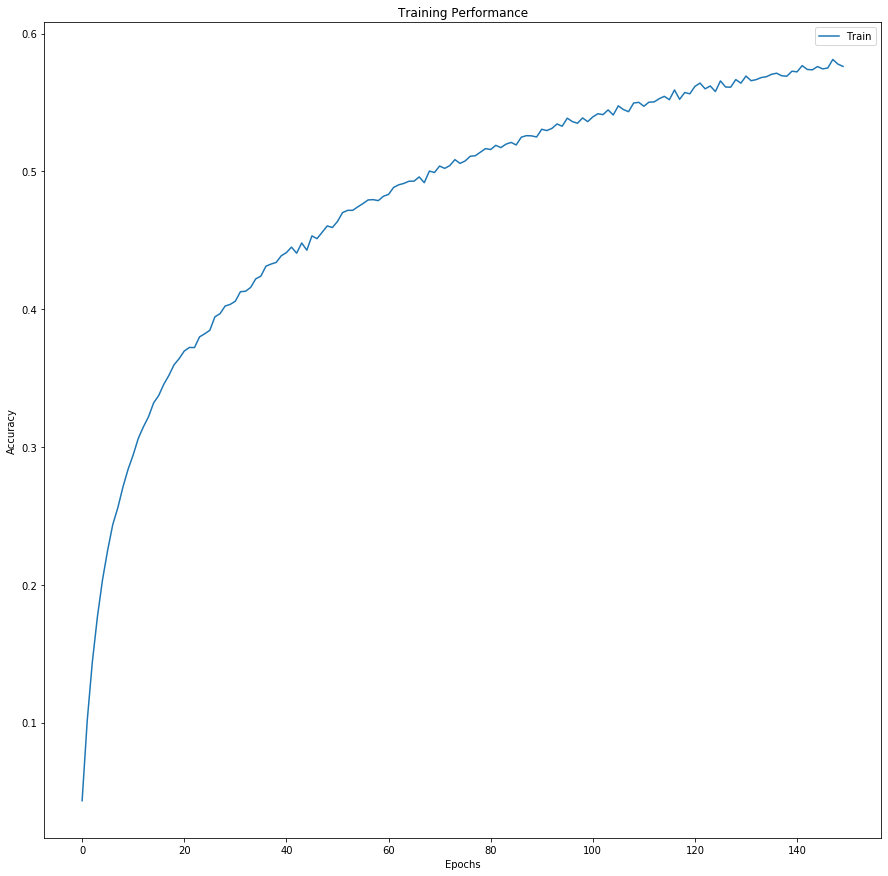

In [ ]:
plt.plot(history.history['acc'])
plt.title('Training Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='best')

plt.draw()
plt.show()

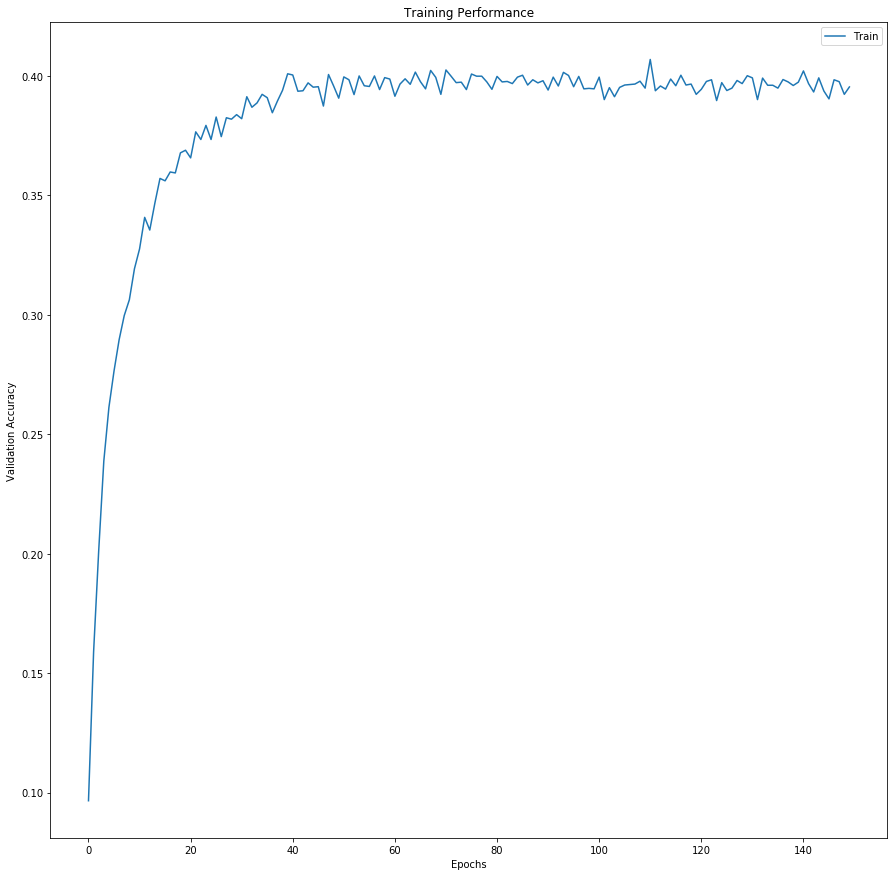

In [ ]:
plt.plot(history.history['val_acc'])
plt.title('Training Performance')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='best')

plt.draw()
plt.show()

### Plot together

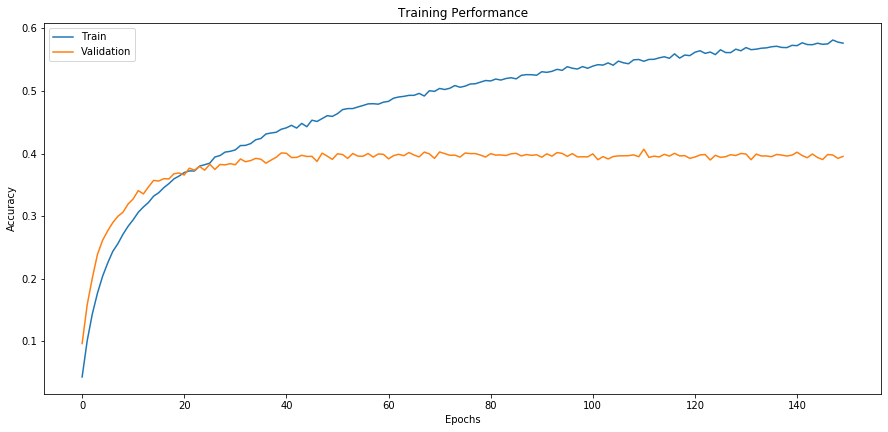

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [15, 15]
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='best')

plt.draw()
plt.show()

### Predict classes on validation data


In [ ]:
prediction_classes_val = model.predict_classes(X_val)

In [ ]:
prediction_classes_val[0:100]

array([72, 73, 84, 97, 40, 62, 88, 52, 10, 46, 97, 24, 71, 18, 14, 83, 95,
       11, 48, 72, 86, 82, 10, 41, 70, 52, 25, 92, 90, 25, 88, 95, 56, 89,
        9, 59, 33, 50, 42, 36, 41,  6, 83, 87,  2, 10, 58,  5, 94, 93, 47,
        2, 14,  3, 79,  3, 40, 19, 90, 70, 14, 75, 40, 36, 36, 63,  3, 47,
       20, 34, 98, 73, 84, 79,  0, 38, 90, 28, 65, 37, 89, 66, 54, 36, 46,
       27, 15, 18, 95, 19, 10, 14, 45, 94,  8, 28,  4, 40, 80, 53])

#### Look at the correct validation values



In [ ]:
np.argmax(Y_val,axis=1)[0:100]

array([49, 65, 40, 32, 35, 62, 74, 52, 13,  2, 74,  7, 71, 77, 44, 70, 73,
       56, 48, 66, 86, 79, 10, 41, 92, 96, 25,  1, 90, 44, 26, 95, 56, 89,
       20, 80, 74, 24, 42, 88, 41,  6, 83, 87,  2, 22, 58,  5, 94, 93, 59,
       24, 19, 55, 31, 21, 10, 89, 90, 92, 14, 78, 22, 24,  5, 74, 38, 52,
       20, 42, 13, 73,  5, 79,  0, 79, 90, 28, 35, 37, 89, 38, 54, 77, 35,
       12, 97, 33, 95, 19, 83, 62, 26, 94,  8, 28, 55, 22, 67,  0])

### The confusion matrix



In [ ]:
confusion_matrix(np.argmax(Y_val,1), prediction_classes_val)

array([[101,   1,   2, ...,   0,   0,   1],
       [  0,  70,   0, ...,   0,   0,   0],
       [  2,   1,  40, ...,   2,   7,   1],
       ...,
       [  0,   2,   0, ...,  51,   0,   0],
       [  1,   1,  13, ...,   2,  35,   1],
       [  0,   0,   1, ...,   2,   1,  42]])

### Evaluate the model


In [ ]:
prediction_classes_test = model.predict_classes(X_test)

In [ ]:
confusion_matrix(np.argmax(Y_test,1), prediction_classes_test)

array([[69,  1,  0, ...,  0,  0,  0],
       [ 1, 59,  1, ...,  1,  1,  0],
       [ 1,  1, 32, ...,  0,  7,  0],
       ...,
       [ 0,  0,  0, ..., 31,  3,  0],
       [ 0,  1,  5, ...,  1, 19,  2],
       [ 0,  0,  0, ...,  1,  0, 34]])

In [ ]:
accuracy_score(np.argmax(Y_test,1), prediction_classes_test)

0.3954